<a href="https://colab.research.google.com/github/Soum110/Advanced-House-price-prediction/blob/main/House_price_prediction_using_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [ ]:
import numpy as np #importing the numpy library as np
import matplotlib.pyplot as plt #importing the matplotlib.pyplot library as plt
import pandas as pd #importing the pandas library as pd
import seaborn as sns #importing the numpy library as np
import calendar #importing the calendar library

from pandas.api.types import CategoricalDtype #importing from pandas api types the class CategoricalDtypes

from sklearn.preprocessing import StandardScaler #importing from sklearn.preprocessing the class StandardScaler

##Data Loading

In [ ]:
train_data_path = r"/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv" #assigning the dataset train.csv as raw string into the variable train_data_path
test_data_path = r"/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv" #assigning the dataset test.csv as raw string into the variable test_data_path

df_train = pd.read_csv(train_data_path) #reading the csv file and assigning it to a variable df_train (making training dataset dataframe)
df_test = pd.read_csv(test_data_path) #reading the csv file and assigning it to a variable df_test (making testing dataset dataframe)

print(df_train.shape) #printing the shape of df_train
print(df_test.shape) #printing the shape of df_test

(1460, 81)
(1459, 80)


In [ ]:
df_train.head() #displaying the training dataset head (first 5 rows)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df_test.head() #displaying the testing dataset head (first 5 rows)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


#Data Preprocessing

In data preprocessing the first step will be to understand the given data feature by feature and assign values according to domain experts instruction to the feature where there is no values given

Features to be converted to numbers:
1. Neighborhood
2. OverallQual
3. OverallCond
4. YearBuilt
5. Foundation
6. Electrical
7. KitchenQual
8. GarageType
9. GarageFinish
10. Fence
...etc.

In [ ]:
#data integration
integrated_df = pd.concat([df_train, df_test]) #concatinating the dataset df_train and df_test and assigning it to integrated_df

print("Shape of Integrated Data: ", integrated_df.shape) #printing the shape of integrated_df

integrated_df.head() #displaying the integrated dataset head (first 5 rows)


Shape of Integrated Data:  (2919, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [ ]:
integrated_df.info() #displaying the information of the dataset for deciding the preprocessing stategies to be applied for each feature

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [ ]:
int_features = integrated_df.select_dtypes(include=['int64']).columns #selecting the features of the type 'int64'
print("Total number of integer features : ", int_features.shape[0]) #printing the number of integer features

print("Integer feature names: ", int_features.tolist()) #creating a list of numerical features

Total number of integer features :  26
Integer feature names:  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [ ]:
categorical_features = integrated_df.select_dtypes(include=['object']).columns #selecting the features of the type 'object'
print("Total number of object features : ", categorical_features.shape[0]) #printing the number of categorical features

print("Object feature names: ", categorical_features.tolist()) #creating a list of categorical features

Total number of object features :  43
Object feature names:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [ ]:
float_features = integrated_df.select_dtypes(include=['float64']).columns #selecting the features of the type 'float64'
print("Total number of Float features : ", float_features.shape[0]) #printing the number of floating type features

print("Float feature names: ", float_features.tolist())#creating a list of floating features

Total number of Float features :  12
Float feature names:  ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [ ]:
integrated_df.describe() #displaying the features attributes like mean, standard deviation, count, ..etc

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [ ]:
integrated_df.describe().shape #shape of the description table (float64 + int64)

(8, 38)

##Handling missing values

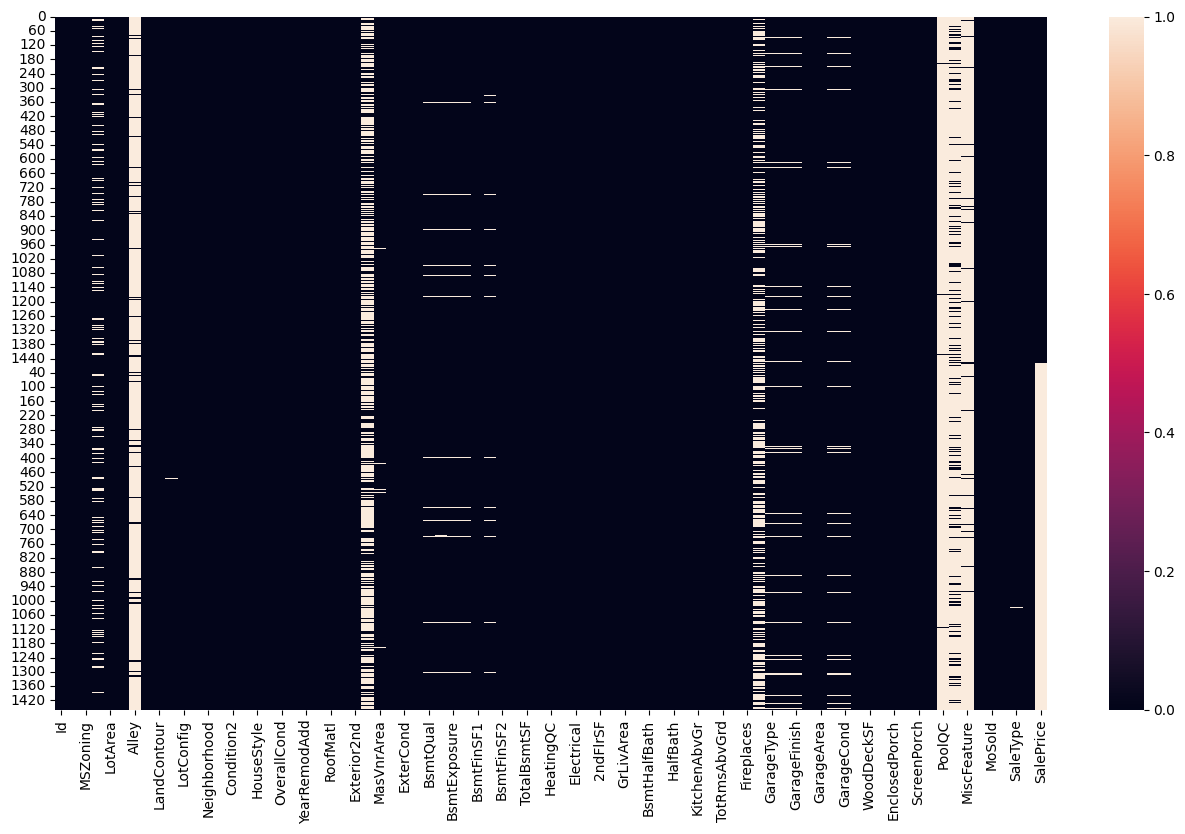

In [ ]:
#Visualize null/Missing value
plt.figure(figsize=(16, 9)) #size of viewport
sns.heatmap(integrated_df.isnull()) #implementing heatmap for the features to recognize null values
plt.savefig("/content/drive/MyDrive/house-prices-advanced-regression-techniques/Figs/") #saving the heatmap to a file named 'Figs'

In [ ]:
integrated_df = integrated_df.set_index('Id') #seting id as index variable

In [ ]:
null_present = integrated_df.isnull().sum() #assigning the number of null values in each attribute to null_present
null_present #displaying the number of null values in each attributes

,0
MSSubClass,0
MSZoning,4
LotFrontage,486
LotArea,0
Street,0
...,...
MoSold,0
YrSold,0
SaleType,1
SaleCondition,0


In [ ]:
null_present = integrated_df.isnull().sum()/integrated_df.shape[0]*100 #assigning the persentage of the number of null values in each attribute to null_present
null_present #displaying the percentage of the number of null values in each attributes

,0
MSSubClass,0.000000
MSZoning,0.137033
LotFrontage,16.649538
LotArea,0.000000
Street,0.000000
...,...
MoSold,0.000000
YrSold,0.000000
SaleType,0.034258
SaleCondition,0.000000


In [ ]:
#missing value imputation

missing_value_features = null_present[null_present > 0] #seperating the attributes containing null values among all the attributes
print("Total missing value features: ", len(missing_value_features)) #printing the number of features containing null values

missing_value_features #displaying the features containing null values

Total missing value features:  35


,0
MSZoning,0.137033
LotFrontage,16.649538
Alley,93.216855
Utilities,0.068517
Exterior1st,0.034258
Exterior2nd,0.034258
MasVnrType,60.500171
MasVnrArea,0.787941
BsmtQual,2.774923
BsmtCond,2.809181


In [ ]:
integer_na_features = missing_value_features[missing_value_features.keys().isin(int_features)] #getting the information that among the null value features how many are of the type "int64"
print("Total number of categorical missing features : ", len(integer_na_features)) #printing the number of "int64" type null value features
integer_na_features #displaying all the "int64" type null value features


Total number of categorical missing features :  0


,0


In [ ]:
categorical_na_features = missing_value_features[missing_value_features.keys().isin(categorical_features)]#getting the information that among the null value features how many are of the type "object"
print("Total number of categorical missing features : ", len(categorical_na_features)) #printing the number of "object" type null value features
categorical_na_features #displaying all the "object" type null value features


Total number of categorical missing features :  23


,0
MSZoning,0.137033
Alley,93.216855
Utilities,0.068517
Exterior1st,0.034258
Exterior2nd,0.034258
MasVnrType,60.500171
BsmtQual,2.774923
BsmtCond,2.809181
BsmtExposure,2.809181
BsmtFinType1,2.706406


In [ ]:
float_na_features = missing_value_features[missing_value_features.keys().isin(float_features)] #getting the information that among the null value features how many are of the type "float64"
print("Total number of categorical missing features : ", len(float_na_features)) #printing the number of "float64" type null value features

float_na_features #displaying all the "float64" type null value features

Total number of categorical missing features :  12


,0
LotFrontage,16.649538
MasVnrArea,0.787941
BsmtFinSF1,0.034258
BsmtFinSF2,0.034258
BsmtUnfSF,0.034258
TotalBsmtSF,0.034258
BsmtFullBath,0.068517
BsmtHalfBath,0.068517
GarageYrBlt,5.447071
GarageCars,0.034258


For,
1. Categorical feature --> use 'mode' for central tendency
2. Numberical feature --> can use 'mean', 'mode' or 'median' for central tendency

In [ ]:
df_mvi = integrated_df.copy() #creating a copy of the dataset for the further datapreprocessing tasks

###Handling MSZoning

In [ ]:
integrated_df['MSZoning'].value_counts() #counting the number of different types of values(catagories) in 'MSZoning' before imputation

,count
MSZoning,
RL,2265
RM,460
FV,139
RH,26
C (all),25


In [ ]:
#imputing MSZoning feature
mszoning_mode = df_mvi['MSZoning'].mode()[0] #Calculating the mode value of the feature 'MSZoning'
df_mvi['MSZoning'].replace(np.nan, mszoning_mode, inplace= True) #replacing all the null values by the mode value
df_mvi['MSZoning'].isnull().sum() #testing for the null values if any remains

/tmp/ipython-input-4236062497.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['MSZoning'].replace(np.nan, mszoning_mode, inplace= True) #replacing all the null values by the mode value


np.int64(0)

In [ ]:
df_mvi['MSZoning'].value_counts() #counting the number of different types of values(catagories) in 'MSZoning' after imputation

,count
MSZoning,
RL,2269
RM,460
FV,139
RH,26
C (all),25


###Handling Alley

In [ ]:
integrated_df['Alley'].value_counts() #counting the number of different types of values(catagories) in 'Alley' before imputation

,count
Alley,
Grvl,120
Pave,78


In [ ]:
#imputing Alley feature
alley_const = "NA" #assigning a conatant/string value 'NA' to alley_const
df_mvi['Alley'].replace(np.nan, alley_const, inplace= True) #replacing all the null values by the alley_const
df_mvi['Alley'].isnull().sum() #testing for the null values if any remains

/tmp/ipython-input-2840101004.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Alley'].replace(np.nan, alley_const, inplace= True) #replacing all the null values by the alley_const


np.int64(0)

In [ ]:
df_mvi['Alley'].value_counts() #counting the number of different types of values(catagories) in 'Alley' after imputation

,count
Alley,
NA,2721
Grvl,120
Pave,78


###Handling LotFrontage

In [ ]:
def boxHistPlot(integrated_df, figsize = (16, 9)): #Creating a function to plot the box plot and histigram plot of any feature
  plt.figure(figsize=figsize) #ploting the base graph
  plt.subplot(1, 2, 1) #subplot for the box plot
  sns.boxplot(integrated_df) #ploting from the data integrated_df
  plt.subplot(1, 2, 2) #subplot for the box plot
  sns.histplot(integrated_df) #ploting from the data integrated_df
  plt.show() #displays the plots

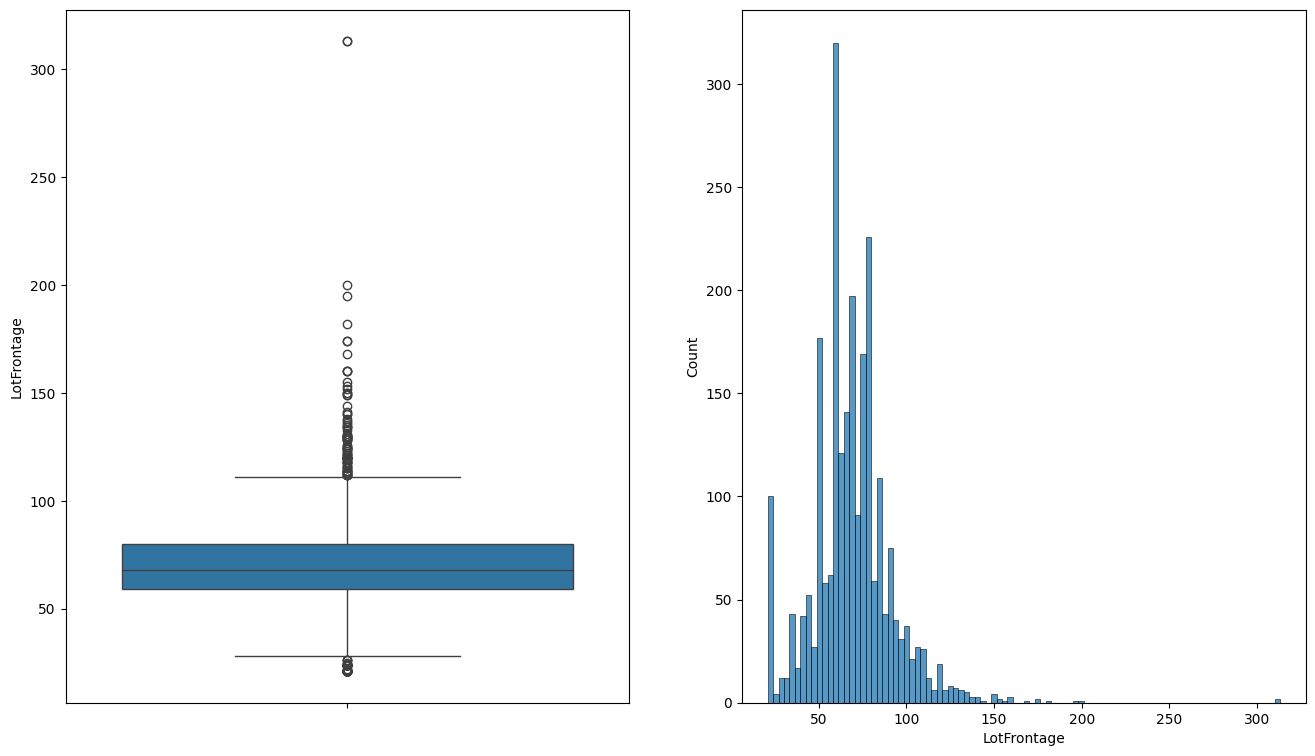

In [ ]:
boxHistPlot(integrated_df['LotFrontage']) #calling the function "boxHistPlot" for the feature 'LotFrontage'

Since data is right scewed, we will use median for null values

In [ ]:
lotfrontage_median = df_mvi['LotFrontage'].median() #Calculating the median value of the feature 'LotFrontage'
df_mvi['LotFrontage'].replace(np.nan, lotfrontage_median, inplace= True) #replacing all the null values by the median value
df_mvi['LotFrontage'].isnull().sum() #testing for the null values if any remains

/tmp/ipython-input-955749291.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['LotFrontage'].replace(np.nan, lotfrontage_median, inplace= True) #replacing all the null values by the median value


np.int64(0)

### Handling Utilities

In [ ]:
integrated_df['Utilities'].value_counts() #counting the number of different types of values(catagories) in 'Utilities' before imputation

,count
Utilities,
AllPub,2916
NoSeWa,1


In [ ]:
#imputing Utilities feature
ult_mode = df_mvi['Utilities'].mode()[0] #Calculating the mode value of the feature 'Utilities'
df_mvi['Utilities'].replace(np.nan, ult_mode, inplace= True) #replacing all the null values by the mode value
df_mvi['Utilities'].isnull().sum() #testing for the null values if any remains

/tmp/ipython-input-4019690086.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Utilities'].replace(np.nan, ult_mode, inplace= True) #replacing all the null values by the mode value


np.int64(0)

In [ ]:
df_mvi['Utilities'].value_counts() #counting the number of different types of values(catagories) in 'Utilities' after imputation

,count
Utilities,
AllPub,2918
NoSeWa,1


###Handling Exterior1st & Exterior2nd

In [ ]:
integrated_df['Exterior1st'].value_counts() #counting the number of different types of values(catagories) in 'Exterior1st' before imputation

,count
Exterior1st,
VinylSd,1025
MetalSd,450
HdBoard,442
Wd Sdng,411
Plywood,221
CemntBd,126
BrkFace,87
WdShing,56
AsbShng,44


In [ ]:
integrated_df['Exterior2nd'].value_counts() #counting the number of different types of values(catagories) in 'Exterior2nd' before imputation

,count
Exterior2nd,
VinylSd,1014
MetalSd,447
HdBoard,406
Wd Sdng,391
Plywood,270
CmentBd,126
Wd Shng,81
BrkFace,47
Stucco,47


In [ ]:
#imputing Exterior1st & Exterior2nd feature
ext1_mode = df_mvi['Exterior1st'].mode()[0] #Calculating the mode value of the feature 'Exterior1st'
ext2_mode = df_mvi['Exterior2nd'].mode()[0] #Calculating the mode value of the feature 'Exterior2nd'
df_mvi['Exterior1st'].replace(np.nan, ext1_mode, inplace= True) #replacing all the null values by the mode value
df_mvi['Exterior2nd'].replace(np.nan, ext2_mode, inplace= True) #replacing all the null values by the mode value
df_mvi['Exterior1st'].isnull().sum() #testing for the null values if any remains
df_mvi['Exterior2nd'].isnull().sum() #testing for the null values if any remains

/tmp/ipython-input-3868399953.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Exterior1st'].replace(np.nan, ext1_mode, inplace= True) #replacing all the null values by the mode value
/tmp/ipython-input-3868399953.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

np.int64(0)

In [ ]:
df_mvi['Exterior1st'].value_counts() #counting the number of different types of values(catagories) in 'Exterior1st' after imputation

,count
Exterior1st,
VinylSd,1026
MetalSd,450
HdBoard,442
Wd Sdng,411
Plywood,221
CemntBd,126
BrkFace,87
WdShing,56
AsbShng,44


In [ ]:
df_mvi['Exterior2nd'].value_counts() #counting the number of different types of values(catagories) in 'Exterior2nd' after imputation

,count
Exterior2nd,
VinylSd,1015
MetalSd,447
HdBoard,406
Wd Sdng,391
Plywood,270
CmentBd,126
Wd Shng,81
BrkFace,47
Stucco,47


###Handling MasVnrType &  MasVnrArea

In [ ]:
integrated_df['MasVnrType'].value_counts() #counting the number of different types of values(catagories) in 'MasVnrType' before imputation

,count
MasVnrType,
BrkFace,879
Stone,249
BrkCmn,25


In [ ]:
#imputing MasVnrType feature
MVT_mode = df_mvi['MasVnrType'].mode()[0] #Calculating the mode value of the feature 'MasVnrType'
df_mvi['MasVnrType'].replace(np.nan, MVT_mode, inplace= True) #replacing all the null values by the mode value
df_mvi['MasVnrType'].isnull().sum() #testing for the null values if any remains

/tmp/ipython-input-2886024601.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['MasVnrType'].replace(np.nan, MVT_mode, inplace= True) #replacing all the null values by the mode value


np.int64(0)

In [ ]:
df_mvi['MasVnrType'].value_counts() #counting the number of different types of values(catagories) in 'MasVnrType' after imputation

,count
MasVnrType,
BrkFace,2645
Stone,249
BrkCmn,25


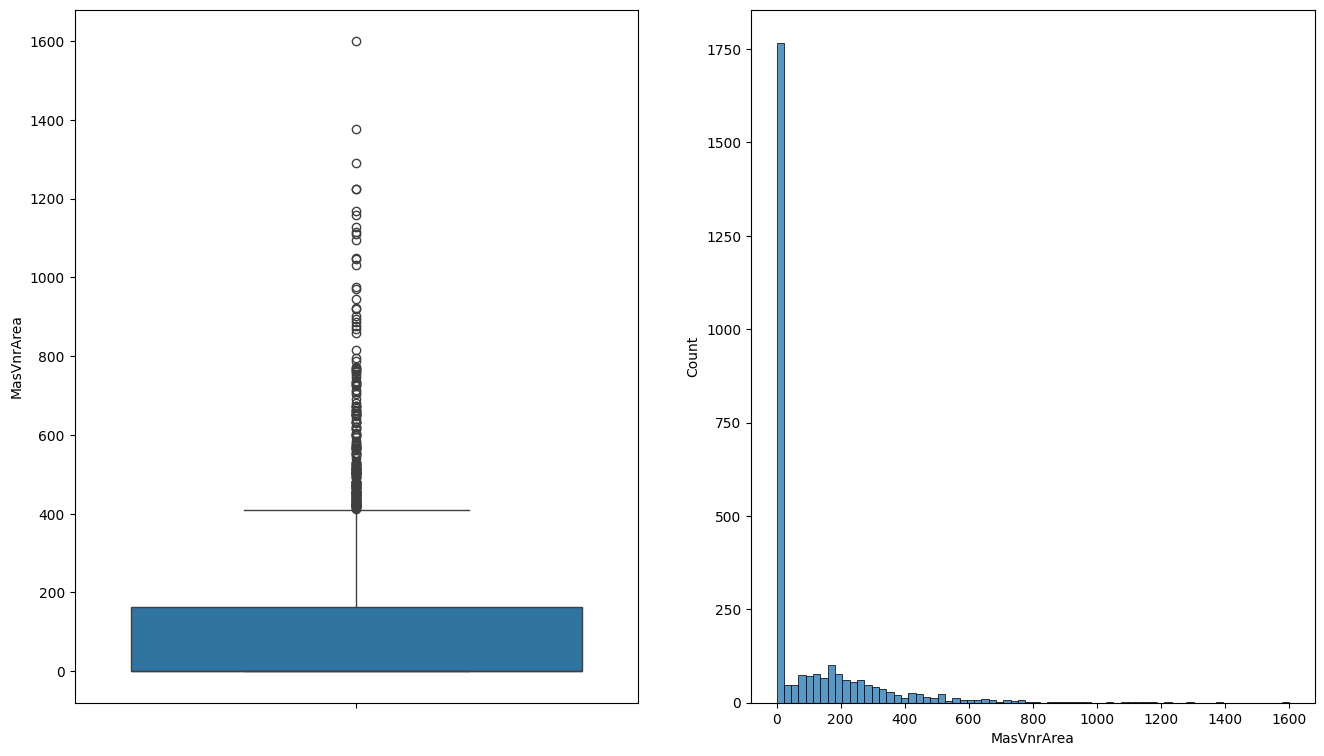

In [ ]:
boxHistPlot(integrated_df['MasVnrArea']) #calling the function "boxHistPlot" for the feature 'MasVnrArea'

In [ ]:
MVA_const = 0 #assigning a conatant value '0' to MVA_const
df_mvi['MasVnrArea'].replace(np.nan, MVA_const, inplace= True) #replacing all the null values by "MVA_const"
df_mvi['MasVnrArea'].isnull().sum() #testing for the null values if any remains

/tmp/ipython-input-945643302.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['MasVnrArea'].replace(np.nan, MVA_const, inplace= True) #replacing all the null values by "MVA_const"


np.int64(0)

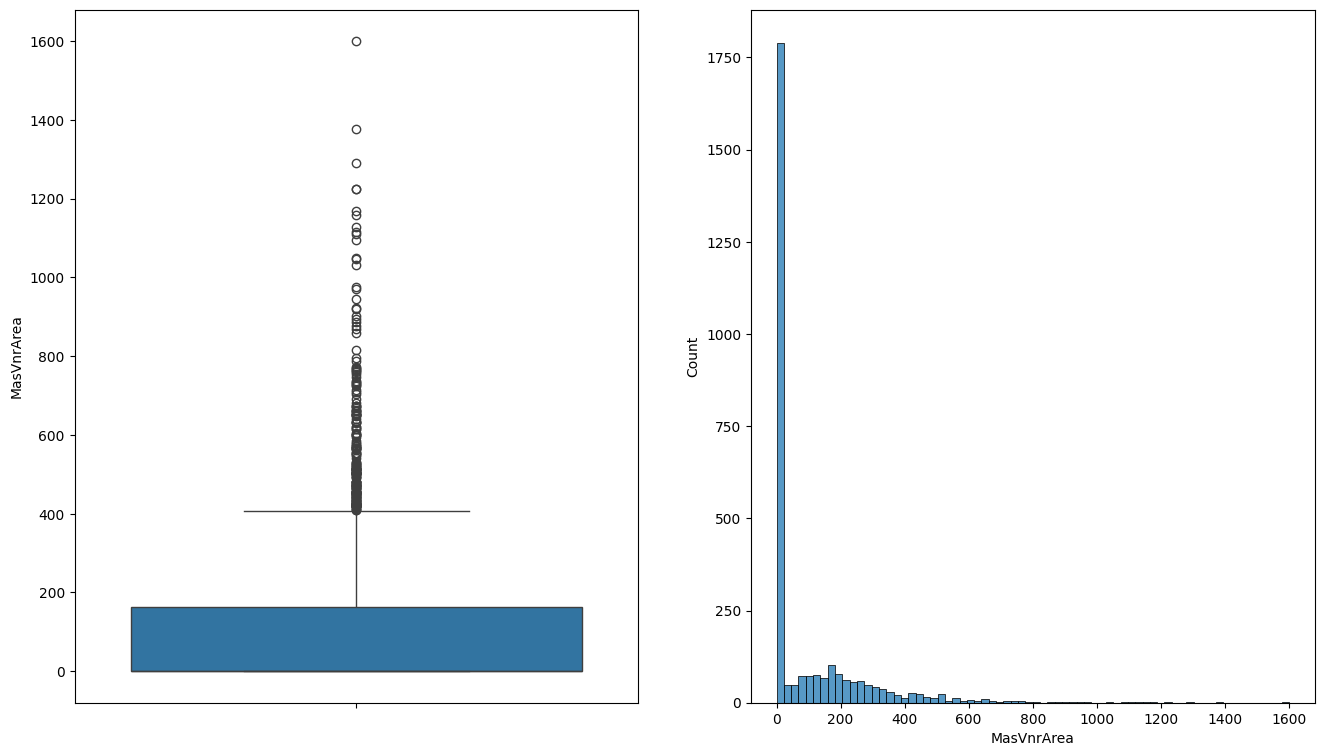

In [ ]:
boxHistPlot(df_mvi['MasVnrArea']) #calling the function "boxHistPlot" for the feature 'MasVnrArea' after imputation

###Handling Basement related attributes

In [ ]:
cat_bsmt_feat =["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"] #Gathering all the basement related categorical features
num_bsmt_feat =["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "BsmtFullBath", "BsmtHalfBath"] #Gathering all the basement related numerical features

In [ ]:
for feat in cat_bsmt_feat : #implementing a for loop to diaplay the value counts/different categories
  print(f"Value count of {feat}: {integrated_df[feat].value_counts()}\n") #counting the number of different types of values(catagories) in all the categorical features before imputation

Value count of BsmtQual: BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64

Value count of BsmtCond: BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64

Value count of BsmtExposure: BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64

Value count of BsmtFinType1: BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64

Value count of BsmtFinType2: BsmtFinType2
Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64



In [ ]:
bsmt_const = "NA" #assigning a conatant value 'NA' to "bsmt_const"
for feat in cat_bsmt_feat : #implementing a for loop to replace the null values
  df_mvi[feat].replace(np.nan, bsmt_const, inplace= True) #replacing all the null values by "bsmt_const"
  print(f"Value count of {feat}: {df_mvi[feat].value_counts()}\n") #counting the number of different types of values(catagories) in all the categorical features after imputation

Value count of BsmtQual: BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
NA      81
Name: count, dtype: int64

Value count of BsmtCond: BsmtCond
TA    2606
Gd     122
Fa     104
NA      82
Po       5
Name: count, dtype: int64

Value count of BsmtExposure: BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
NA      82
Name: count, dtype: int64

Value count of BsmtFinType1: BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
NA      79
Name: count, dtype: int64

Value count of BsmtFinType2: BsmtFinType2
Unf    2493
Rec     105
LwQ      87
NA       80
BLQ      68
ALQ      52
GLQ      34
Name: count, dtype: int64



/tmp/ipython-input-2809845959.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, bsmt_const, inplace= True) #replacing all the null values by "bsmt_const"
/tmp/ipython-input-2809845959.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [ ]:
bsmt_num = 0 #assigning a conatant value '0' to "bsmt_num"
for feat in num_bsmt_feat: #implementing a for loop to replace the null values
  df_mvi[feat].replace(np.nan, bsmt_num, inplace= True) #replacing all the null values by "bsmt_num"
df_mvi[num_bsmt_feat].isnull().sum()  #testing for the null values if any remains

/tmp/ipython-input-1373494039.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, bsmt_num, inplace= True) #replacing all the null values by "bsmt_num"


,0
BsmtFinSF1,0
BsmtFinSF2,0
BsmtUnfSF,0
TotalBsmtSF,0
BsmtFullBath,0
BsmtHalfBath,0


###Handling Electrical & KitchenQual

In [ ]:
elec_mode = df_mvi['Electrical'].mode()[0] #Calculating the mode value of the feature 'Electrical'
df_mvi['Electrical'].replace(np.nan, elec_mode, inplace= True) #replacing all the null values by the mode value
df_mvi['Electrical'].isnull().sum() #testing for the null values if any remains

kitq_mode = df_mvi['KitchenQual'].mode()[0] #Calculating the mode value of the feature 'KitchenQual'
df_mvi['KitchenQual'].replace(np.nan, kitq_mode, inplace= True) #replacing all the null values by the mode value
df_mvi['KitchenQual'].isnull().sum() #testing for the null values if any remains

/tmp/ipython-input-70730218.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Electrical'].replace(np.nan, elec_mode, inplace= True) #replacing all the null values by the mode value
/tmp/ipython-input-70730218.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

np.int64(0)

###Handling Functional

In [ ]:
func_mode = df_mvi['Functional'].mode()[0] #Calculating the mode value of the feature 'Functional'
df_mvi['Functional'].replace(np.nan, func_mode, inplace= True) #replacing all the null values by the mode value
df_mvi['Functional'].isnull().sum() #testing for the null values if any remains

/tmp/ipython-input-3106095323.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Functional'].replace(np.nan, func_mode, inplace= True) #replacing all the null values by the mode value


np.int64(0)

###Handling FireplaceQu

In [ ]:
fpq_const = "NA" #assigning a conatant value 'NA' to "fpq_const"
df_mvi['FireplaceQu'].replace(np.nan, fpq_const, inplace= True) #replacing all the null values by "fpq_const"
df_mvi['FireplaceQu'].isnull().sum() #testing for the null values if any remains

/tmp/ipython-input-4191587850.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['FireplaceQu'].replace(np.nan, fpq_const, inplace= True) #replacing all the null values by "fpq_const"


np.int64(0)

###Handling PoolQC

In [ ]:
pqc_const = "NA" #assigning a conatant value 'NA' to "pqc_const"
df_mvi['PoolQC'].replace(np.nan, pqc_const, inplace= True) #replacing all the null values by "pqc_const"
df_mvi['PoolQC'].isnull().sum() #testing for the null values if any remains

/tmp/ipython-input-3833141434.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['PoolQC'].replace(np.nan, pqc_const, inplace= True) #replacing all the null values by "pqc_const"


np.int64(0)

###Handling Fence

In [ ]:
fence_const = "NA" #assigning a conatant value 'NA' to "fence_const"
df_mvi['Fence'].replace(np.nan, fence_const, inplace= True) #replacing all the null values by "fence_const"
df_mvi['Fence'].isnull().sum() #testing for the null values if any remains

/tmp/ipython-input-1638265337.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['Fence'].replace(np.nan, fence_const, inplace= True) #replacing all the null values by "fence_const"


np.int64(0)

###Handling MiscFeature

In [ ]:
miscf_const = "NA" #assigning a conatant value 'NA' to "miscf_const"
df_mvi['MiscFeature'].replace(np.nan, miscf_const, inplace= True) #replacing all the null values by "miscf_const"
df_mvi['MiscFeature'].isnull().sum() #testing for the null values if any remains

/tmp/ipython-input-2872924429.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['MiscFeature'].replace(np.nan, miscf_const, inplace= True) #replacing all the null values by "miscf_const"


np.int64(0)

###Handling SaleType

In [ ]:
sale_mode = df_mvi['SaleType'].mode()[0] #Calculating the mode value of the feature 'SaleType'
df_mvi['SaleType'].replace(np.nan, sale_mode, inplace= True) #replacing all the null values by the mode value
df_mvi['SaleType'].isnull().sum() #testing for the null values if any remains

/tmp/ipython-input-2231100759.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi['SaleType'].replace(np.nan, sale_mode, inplace= True) #replacing all the null values by the mode value


np.int64(0)

###Handling Garage related features

In [ ]:
"""GarageType
GarageFinish
GarageQual
GarageCond

GarageYrBlt
GarageCars
GarageArea""" #selecting all the attributes of garage tyoe

'GarageType\nGarageFinish\nGarageQual\nGarageCond\n\nGarageYrBlt\nGarageCars\nGarageArea'

In [ ]:
num_grg_feat = ["GarageYrBlt", "GarageCars", "GarageArea"]  #Gathering all the garage related categorical features
cat_grg_feat = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"] #Gathering all the garage related numerical features

In [ ]:
grg_const = "NA" #assigning a constant value 'NA' to "grg_const"
for feat in cat_grg_feat : #implementing a for loop to replace the null values
  df_mvi[feat].replace(np.nan, grg_const, inplace= True) #replacing all the null values by "grg_const"
  print(f"Value count of {feat}: {df_mvi[feat].value_counts()}\n") #counting the number of different types of values(catagories) in all the categorical features after imputation

/tmp/ipython-input-843180365.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, grg_const, inplace= True) #replacing all the null values by "grg_const"


Value count of GarageType: GarageType
Attchd     1723
Detchd      779
BuiltIn     186
NA          157
Basment      36
2Types       23
CarPort      15
Name: count, dtype: int64

Value count of GarageFinish: GarageFinish
Unf    1230
RFn     811
Fin     719
NA      159
Name: count, dtype: int64

Value count of GarageQual: GarageQual
TA    2604
NA     159
Fa     124
Gd      24
Po       5
Ex       3
Name: count, dtype: int64

Value count of GarageCond: GarageCond
TA    2654
NA     159
Fa      74
Gd      15
Po      14
Ex       3
Name: count, dtype: int64



/tmp/ipython-input-843180365.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, grg_const, inplace= True) #replacing all the null values by "grg_const"
/tmp/ipython-input-843180365.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [ ]:
grg_num = 0 #assigning a conatant value '0' to "grg_num"
for feat in num_grg_feat: #implementing a for loop to replace the null values
  df_mvi[feat].replace(np.nan, grg_num, inplace= True) #replacing all the null values by "grg_num"
df_mvi[num_bsmt_feat].isnull().sum() #testing for the null values if any remains

/tmp/ipython-input-2552288991.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mvi[feat].replace(np.nan, grg_num, inplace= True) #replacing all the null values by "grg_num"


,0
BsmtFinSF1,0
BsmtFinSF2,0
BsmtUnfSF,0
TotalBsmtSF,0
BsmtFullBath,0
BsmtHalfBath,0


In [ ]:
df_mvi.isnull().any(axis= 1).sum() #counting the remaining null values

np.int64(1459)

###Converting Numerical data to Categorical Data

In [ ]:
for_num_conv = ["MSSubClass", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"] #gathering all the numerical features which should have been categorical features
for feat in for_num_conv: #implementing a for loop to iterate the features
  print(f"{feat}: data type = {df_mvi[feat].dtype}\n") #printing the data type of each feature

MSSubClass: data type = int64

YearBuilt: data type = int64

YearRemodAdd: data type = int64

GarageYrBlt: data type = float64

MoSold: data type = int64

YrSold: data type = int64



In [ ]:
df_mvi["MoSold"].unique() #extracting the unique values of the feature "MoSold" before transformation

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6])

In [ ]:
df_mvi['MoSold'] = df_mvi['MoSold'].apply(lambda x: calendar.month_name[x]) #assigning the numbers to a categorical value of months
df_mvi['MoSold'].unique() #extracting the unique values of the feature "MoSold" after transformation

array(['February', 'May', 'September', 'December', 'October', 'August',
       'November', 'April', 'January', 'July', 'March', 'June'],
      dtype=object)

In [ ]:
for feat in for_num_conv: #implementing a for loop to change the datatype of the features from "int64" to "object"
  df_mvi[feat] = df_mvi[feat].astype(str) #changing the datatype of the features from "int64" to "object"
for feat in for_num_conv: #implementing a for loop to display the new data types of the features
  print(f"{feat}: data type = {df_mvi[feat].dtype}\n") #displays the types of the features

MSSubClass: data type = object

YearBuilt: data type = object

YearRemodAdd: data type = object

GarageYrBlt: data type = object

MoSold: data type = object

YrSold: data type = object



###Converting Categorical Data to Numerical data

####For Ordinal Features

In [ ]:
ordinal_end_var = [ #gathering all the features to be converted to priority valued numbers as per order
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "HeatingQC",
    "KitchenQual",
    "FireplaceQu",
    "GarageQual",
    "GarageCond",
    "PoolQC",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2",
    "Functional",
    "GarageFinish",
    "PavedDrive",
    "Utilities",
    "BsmtFinSF1"
]

print("Total number of ordinal features: ", len(ordinal_end_var)) #displaying the number of ordinal attributes

Total number of ordinal features:  18


In [ ]:
df_mvi['BsmtFinType1'] = df_mvi['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes #giving numbers to each of the categorical values a number based on order
df_mvi['BsmtFinType2'] = df_mvi['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes #giving numbers to each of the categorical values a number based on order
df_mvi['BsmtQual'] = df_mvi['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes #giving numbers to each of the categorical values a number based on order
df_mvi['ExterQual'] = df_mvi['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes #giving numbers to each of the categorical values a number based on order
df_mvi['ExterCond'] = df_mvi['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes #giving numbers to each of the categorical values a number based on order
df_mvi['Functional'] = df_mvi['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'], ordered = True)).cat.codes #giving numbers to each of the categorical values a number based on order
df_mvi['GarageCond'] = df_mvi['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes #giving numbers to each of the categorical values a number based on order
df_mvi['GarageQual'] = df_mvi['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes #giving numbers to each of the categorical values a number based on order
df_mvi['GarageFinish'] = df_mvi['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes #giving numbers to each of the categorical values a number based on order
df_mvi['HeatingQC'] = df_mvi['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes #giving numbers to each of the categorical values a number based on order
df_mvi['KitchenQual'] = df_mvi['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes #giving numbers to each of the categorical values a number based on order
df_mvi['PavedDrive'] = df_mvi['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered = True)).cat.codes #giving numbers to each of the categorical values a number based on order
df_mvi['Utilities'] = df_mvi['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered = True)).cat.codes #giving numbers to each of the categorical values a number based on order
df_mvi['BsmtExposure'] = df_mvi['BsmtExposure'].astype(CategoricalDtype(categories=['NA', 'Mn', 'Av', 'Gd'], ordered = True)).cat.codes #giving numbers to each of the categorical values a number based on order
df_mvi['BsmtCond'] = df_mvi['BsmtCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes #giving numbers to each of the categorical values a number based on order
df_mvi['FireplaceQu'] = df_mvi['FireplaceQu'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes #giving numbers to each of the categorical values a number based on order
df_mvi['PoolQC'] = df_mvi['PoolQC'].astype(CategoricalDtype(categories=['NA', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes #giving numbers to each of the categorical values a number based on order
df_mvi["BsmtFinSF1"] = df_mvi["BsmtFinSF1"].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes #giving numbers to each of the categorical values a number based on order

In [ ]:
df_mvi.info() #diaplaying the informations about the imputed dataset

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

####For Nominal Features (One Hot Encoding)

In [ ]:
df_encode = df_mvi.copy() #creating a copy of the currently imputed dataset for converting the remaining nominal features to one hot encoding

object_features = df_encode.select_dtypes(include=['object']).columns.tolist() #selecting the features having the data type "object"
print("Total number of object features : ", len(object_features)) #printing the number of features having the type "object"

print("Features : \n", object_features) #all the remaining "object" features

Total number of object features :  32
Features : 
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [ ]:
print("Shape of DF before encoding: ", df_encode.shape) #displaying the shape of the current dataset
df_encode = pd.get_dummies(df_encode, columns=object_features, prefix=object_features, drop_first=True) #creating the one hot encodings for the nominal features
print("Shape of DF after encoding: ", df_encode.shape) #displaying the shape of the dataset after one hot encoding

Shape of DF before encoding:  (2919, 80)
Shape of DF after encoding:  (2919, 512)


#Split Data into training and testing sets

In [ ]:
df_encode.shape #displaying the shape of the dataset after one hot encoding

(2919, 512)

In [ ]:
len_train = df_train.shape[0] #storing the number of the training examples in the training dataset into "len_train"
len_train #displaying the number of training examples

1460

In [ ]:
x_train = df_encode[:len_train].drop("SalePrice", axis=1) #retaining the features upto "SalePrice" and separating the feature "SalePrice"
y_train = df_encode[:len_train]["SalePrice"] #only storing the feature "SalePrice"
x_test = df_encode[len_train:].drop("SalePrice", axis=1) #geting the remaining features after "SalePrice"

print(x_train.shape) #printing the shape of the x_train
print(y_train.shape) #printing the shape of the y_train
print(x_test.shape) #printing the shape of the x_test

(1460, 511)
(1460,)
(1459, 511)


##Feature Scaling

In [ ]:
sc = StandardScaler() #calling the StandardScaler() class
sc.fit(x_train) #Formula => z = (x-u)/s

x_train = sc.transform(x_train) #transforming the x_train according to the above formula
x_test = sc.transform(x_test) #transforming the x_test according to the above formula

In [ ]:
x_train[:5,:] #after transformation first 6 rows of training dataset

array([[-0.21271975, -0.20714171,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.46815755, -0.09188637,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.07654429,  0.07347998,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.43967884, -0.09689747,  0.02618016, ..., -0.11785113,
        -2.13834494, -0.30599503],
       [ 0.64972483,  0.37514829,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [ ]:
x_test[:5,:] #after transformation first 6 rows of testing dataset

array([[ 0.46815755,  0.11076257,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.51354937,  0.37584985,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.19580663,  0.33205282,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.37737391, -0.05400244,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-1.21133978, -0.5524066 ,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

#Model Training

In [ ]:
from sklearn.linear_model import SGDRegressor #from sklearn linear_model importing SGDRegressor class
from sklearn.metrics import r2_score, mean_squared_error #from sklearn metrics importing r2_score and mean_squared_error class

In [ ]:
# Initialize SGD Regressor
sgd = SGDRegressor(
    max_iter=1,        # 1 iteration per partial_fit (we'll loop manually for epochs)
    learning_rate='invscaling', #decreases the learning rate with time
    eta0=0.001,         # initial learning rate
    random_state=42,    #Sets the seed for random number generation
    warm_start=True     # keep weights between calls
)


In [ ]:
# Lists to track metrics
epochs = 50 #number of epochs
train_r2_scores = [] #an arrey to store the accuracy values after each epoch
train_rmse_scores = [] #an arrey to store the RMSE values after each epoch

# Loop through epochs
for epoch in range(epochs):
    sgd.partial_fit(x_train, y_train)  # perform one epoch of training

    # Predictions
    y_pred_train = sgd.predict(x_train) #prediction value

    # Metrics
    r2 = r2_score(y_train, y_pred_train) #calculating the accuracy
    rmse = np.sqrt(mean_squared_error(y_train, y_pred_train)) #calculating the RMSE

    train_r2_scores.append(r2) #appending the accuracy values after each epoch
    train_rmse_scores.append(rmse) #appending the RMSE values after each epoch

y_pred_test = sgd.predict(x_test) # Final prediction on test set (since y_test is missing, we only predict)

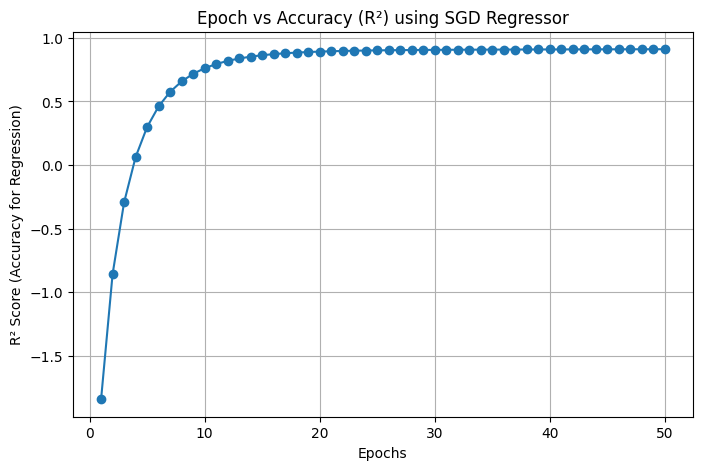

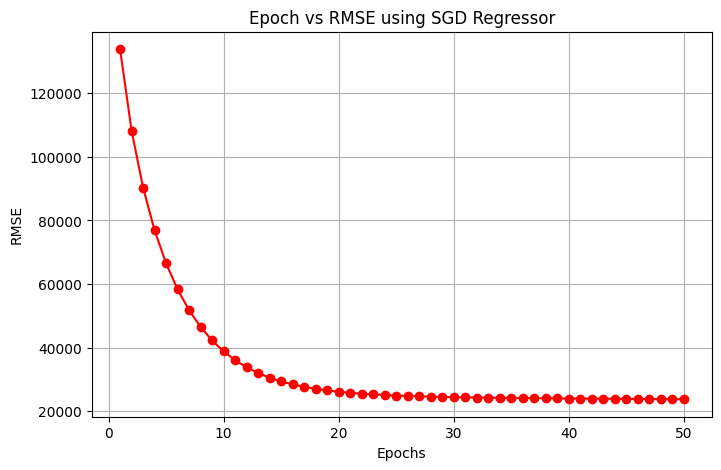

In [ ]:
# Plot Epoch vs R² Score
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_r2_scores, marker='o')
plt.xlabel("Epochs")
plt.ylabel("R² Score (Accuracy for Regression)")
plt.title("Epoch vs Accuracy (R²) using SGD Regressor")
plt.grid(True)
plt.show()

# Plot Epoch vs RMSE
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_rmse_scores, marker='o', color='red')
plt.xlabel("Epochs")
plt.ylabel("RMSE")
plt.title("Epoch vs RMSE using SGD Regressor")
plt.grid(True)
plt.show()

# Final prediction on test set (since y_test is missing, we only predict)
y_pred_test = sgd.predict(x_test)

In [ ]:
print(f"Accuracy = {r2*100}") #displays the accuracy persentage
print("Predicted house prices (test set):") #printing the predicted house prices for the test dataset
print(y_pred_test[:]) #printing the predicted house prices for the test dataset

Accuracy = 91.01309489051457
Predicted house prices (test set):
[106258.52237389 140878.28645287 172442.24428459 ... 177400.18618525
  96659.2090722  218618.26777588]
